<a href="https://colab.research.google.com/github/AsthaKapil2000/Covid-19-Data-Analysis/blob/main/Covid_19_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [ ]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Covid cases in India.xlsx to Covid cases in India (3).xlsx


In [ ]:
df=pd.read_excel(r"Covid cases in India (3).xlsx")

In [ ]:
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [ ]:
df.drop(['S. No.'],axis=1,inplace=True)

In [ ]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [ ]:
df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']

In [ ]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [ ]:
total_cases_overall=df['Total Cases'].sum()
print('The total number of cases till now in India is ',total_cases_overall)

The total number of cases till now in India is  729


In [ ]:
df['Active Cases']=df['Total Cases']-(df['Death']+df['Cured'])

In [ ]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [ ]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,32
3,Gujarat,43,0,0,3,43,40
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,3
6,Karnataka,20,0,3,2,20,15
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,22
9,Maharashtra,144,3,15,4,147,128


In [ ]:
Total_Active_Cases=df.groupby('Name of State / UT')['Total Cases'].sum().sort_values(ascending=False).to_frame()

In [ ]:
Total_Active_Cases

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


In [ ]:
Total_Active_Cases.style.background_gradient(cmap='Reds')

,Total Cases
Name of State / UT,
Maharashtra,147
Kerala,138
Telengana,45
Uttar Pradesh,43
Rajasthan,43
Gujarat,43
Delhi,39
Tamil Nadu,35
Haryana,30


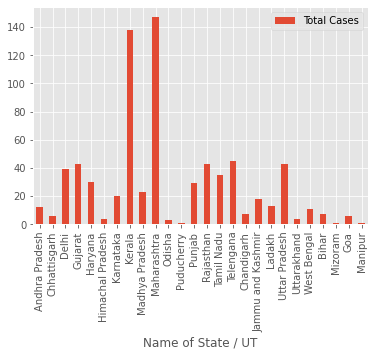

In [ ]:
#Pandas vis
df.plot(kind='bar',x='Name of State / UT',y='Total Cases')
plt.show()
#Plotly
df.iplot(kind='bar',x='Name of State / UT',y='Total Cases')

<BarContainer object of 26 artists>

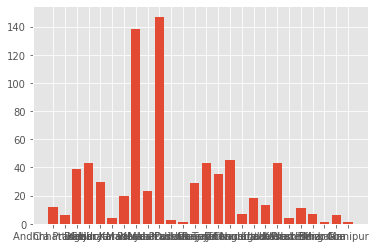

In [ ]:
#Matplotlib vis

plt.bar(df['Name of State / UT'],df['Total Cases'])

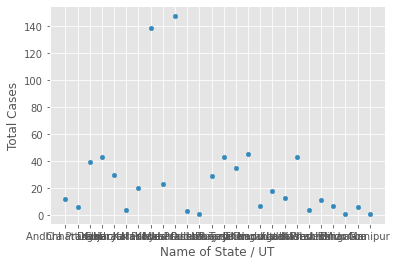

In [ ]:
df.plot(kind='scatter',x='Name of State / UT',y='Total Cases')

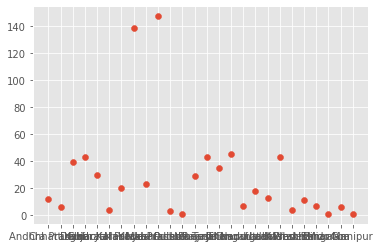

In [ ]:
plt.scatter(df['Name of State / UT'],df['Total Cases'])

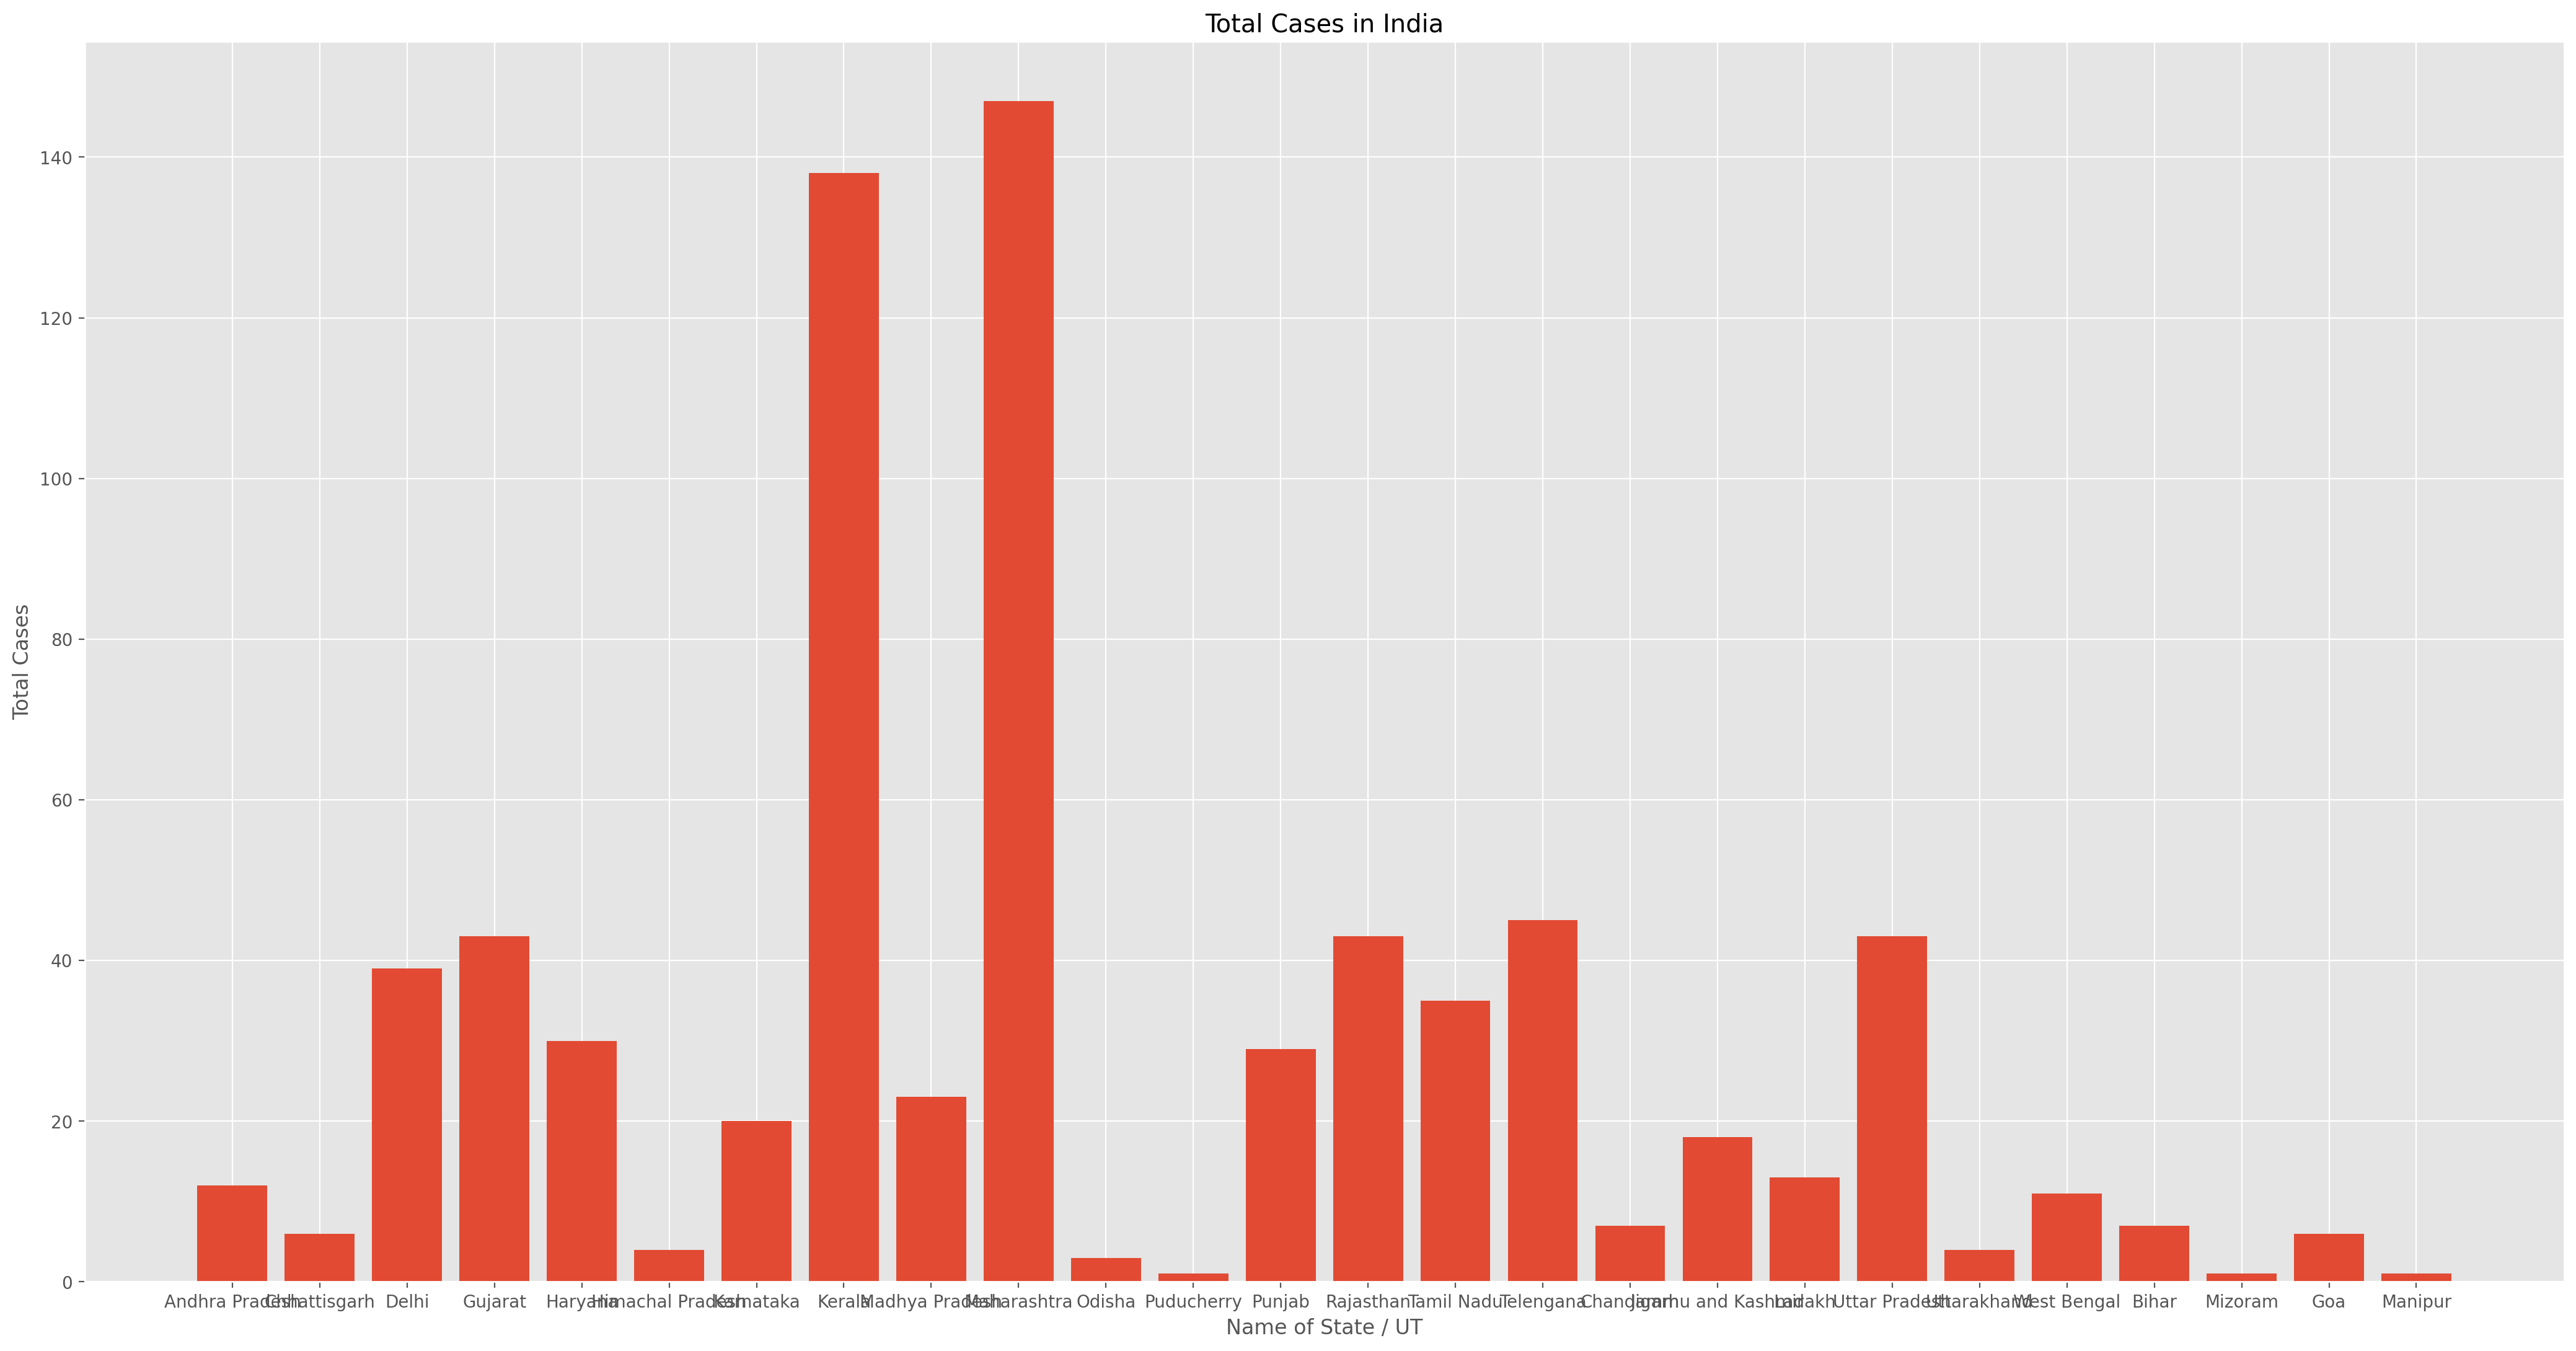

In [ ]:
#Matplotlib
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.show()

#plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Indian Coordinates.xlsx to Indian Coordinates (1).xlsx


In [ ]:
Indian_Cord=pd.read_excel(r"Indian Coordinates (1).xlsx")

In [ ]:
Indian_Cord

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [ ]:
df_full=pd.merge(Indian_Cord,df,on='Name of State / UT')

In [ ]:

df_full

,Name of State / UT,Latitude,Longitude,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,14.750429,78.570026,12,0,1,0,12,11
1,Delhi,28.669993,77.230004,38,1,6,1,39,32
2,Haryana,28.450006,77.019991,16,14,11,0,30,19
3,Karnataka,12.570381,76.919997,20,0,3,2,20,15
4,Kerala,8.900373,76.569993,131,7,11,0,138,127
5,Maharashtra,19.250232,73.160175,144,3,15,4,147,128
6,Punjab,31.519974,75.980003,29,0,0,1,29,28
7,Rajasthan,26.449999,74.639981,41,2,3,0,43,40
8,Telengana,18.112400,79.019300,34,11,1,0,45,44
9,Tamil Nadu,12.920386,79.150042,32,3,1,1,35,33


In [ ]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

In [ ]:
map

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving per_day_cases.xlsx to per_day_cases (1).xlsx


In [ ]:
dbd_India=pd.read_excel(r"per_day_cases (1).xlsx",parse_dates=True,sheet_name="India")
dbd_Italy=pd.read_excel(r"per_day_cases (1).xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel(r"per_day_cases (1).xlsx",parse_dates=True,sheet_name="Korea")
dbd_Wuhan=pd.read_excel(r"per_day_cases (1).xlsx",parse_dates=True,sheet_name="Wuhan")

In [ ]:
dbd_India


,Date,Total Cases,New Cases,Days after surpassing 100 cases
0,2020-01-30,1,1,NaN
1,2020-01-31,1,0,NaN
2,2020-02-01,1,0,NaN
3,2020-02-02,2,1,NaN
4,2020-02-03,3,1,NaN
5,2020-02-04,3,0,NaN
6,2020-02-05,3,0,NaN
7,2020-02-06,3,0,NaN
8,2020-02-07,3,0,NaN
9,2020-02-08,3,0,NaN


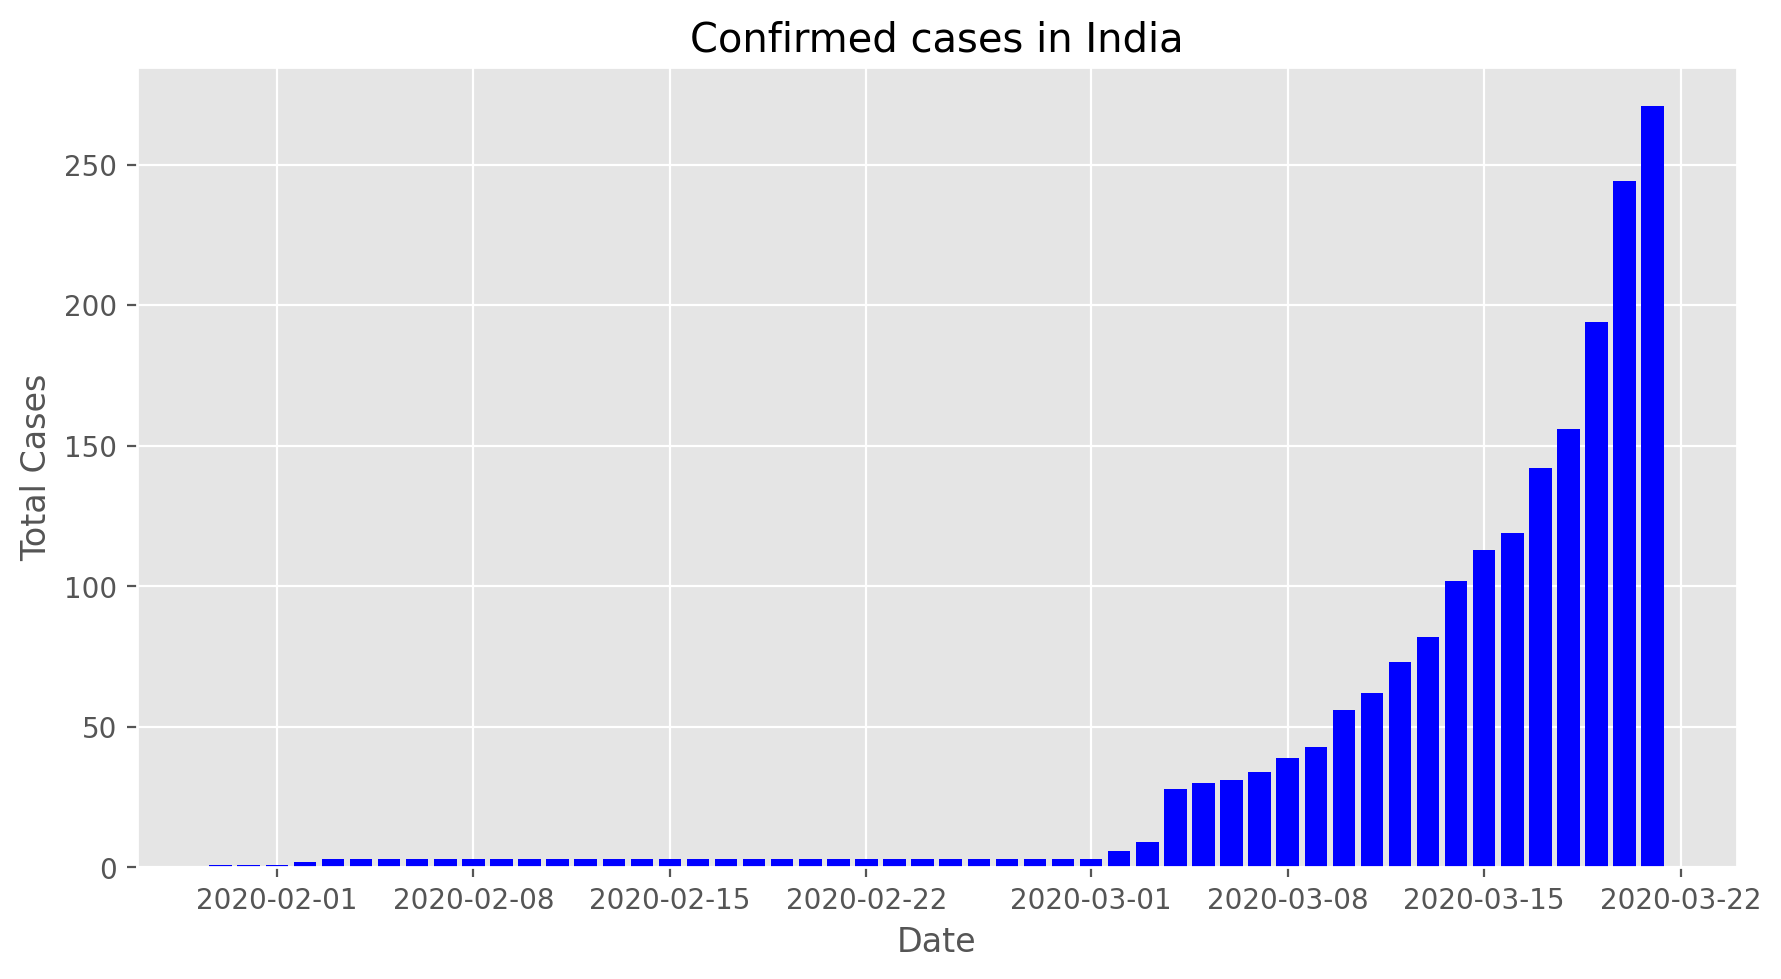

In [ ]:
#Matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


#plotly Express

fig=px.bar(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()

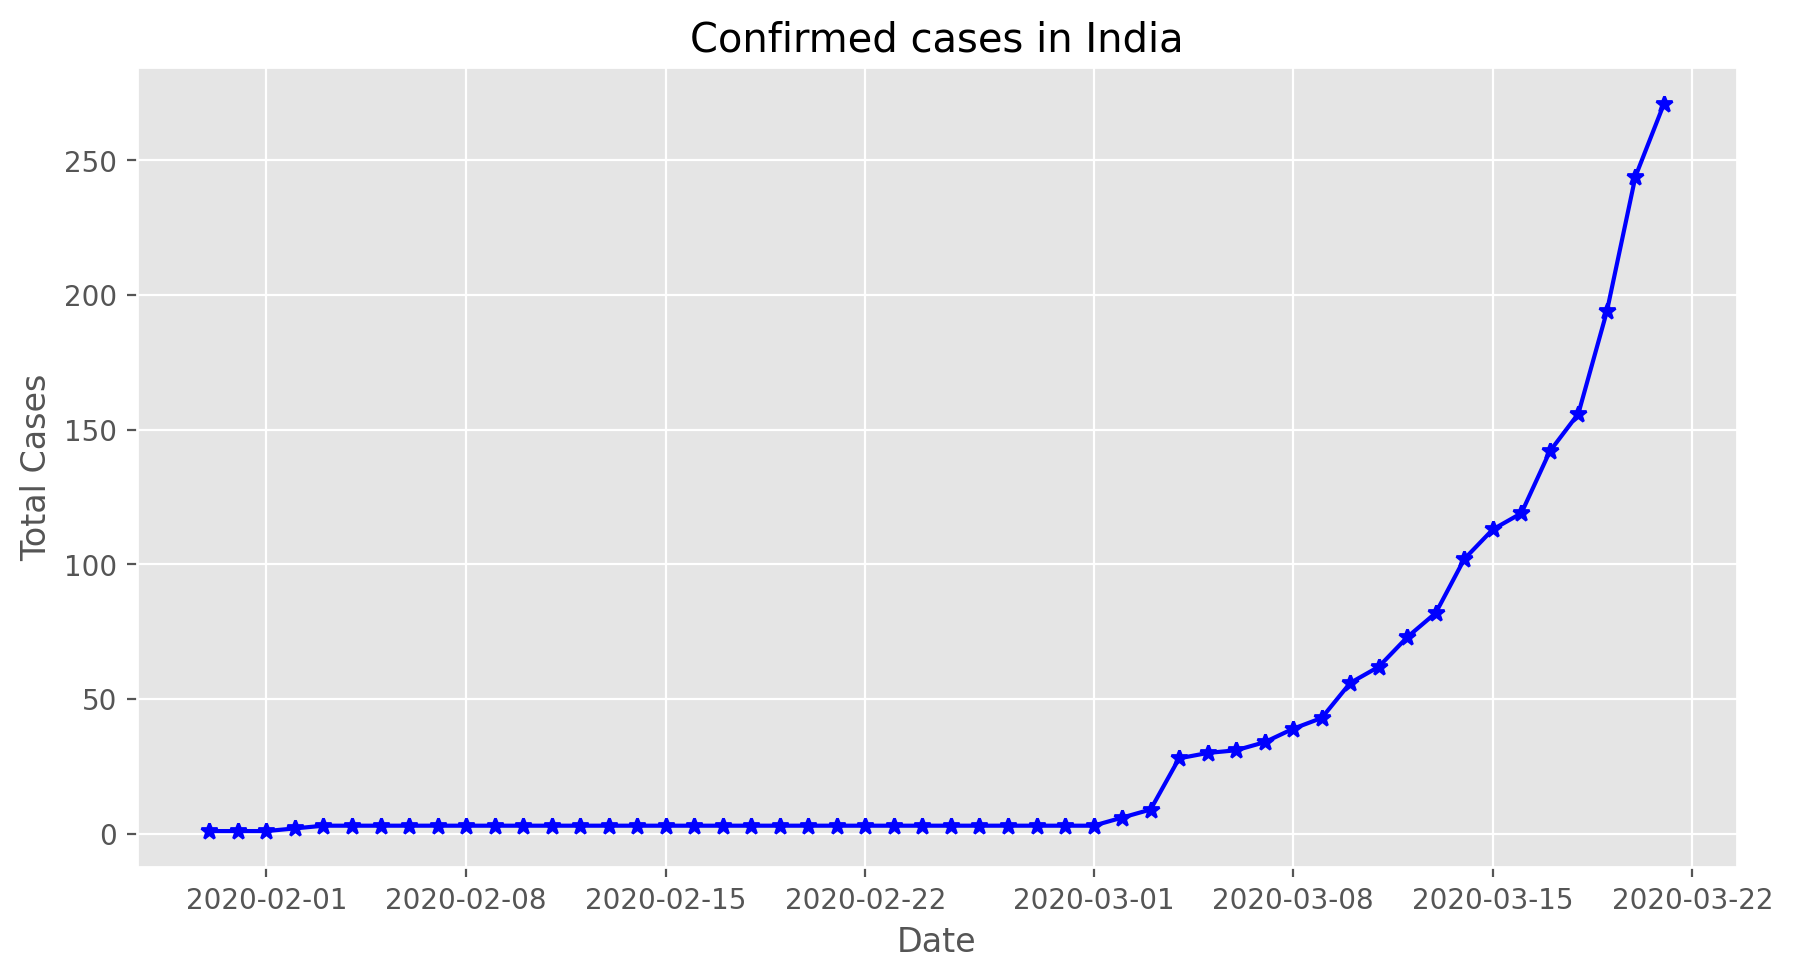

In [ ]:
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_India["Date"],dbd_India["Total Cases"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()


#plotly Express

fig=px.scatter(dbd_India,x="Date",y="Total Cases",color='Total Cases',title='Confirmed cases in India')
fig.show()
